# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [2]:
N = 16 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print("Реализуем алгоритм кластеризации '%s'"% (my_algorithm))

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [7]:
from itertools import combinations

In [8]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """

    def __init__(self, k=2, linkage='single', **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.k = k
        self.linkage = linkage
        return

    def __dist(self, X):
        x_dist = (X ** 2).sum(axis=1)
        xy_dist = X.dot(X.T)
        dist = - 2 * xy_dist + x_dist + x_dist.reshape(-1, 1)
        return dist

    def __single(self, A, B):
        return np.min(self.dist[A].T[B])

    def __complete(self, A, B):
        return np.max(self.dist[A].T[B])

    def __average(self, A, B):
        return np.sum(self.dist[A].T[B]) / (len(A) * len(B))

    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.dist = self.__dist(x)
        self.x_len = len(x)
        self.C = [[i] for i in range(self.x_len)]
        if self.linkage == 'single':
            self.L = self.__single
        elif self.linkage == 'complete':
            self.L = self.__complete
        elif self.linkage == 'average':
            self.L = self.__average
        return self

    def __search(self, c_min1, c_min2, buff):
        for c1, c2 in combinations(self.C, 2):
            buff2 = self.L(c1, c2)
            if buff2 < buff:
                c_min1, c_min2, buff = c1, c2, buff2
        return c_min1, c_min2, buff

    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """

        while len(self.C) > self.k:
            buff = self.L(self.C[0], self.C[1])
            c_min1, c_min2 = self.C[0], self.C[1]
            c_min1, c_min2, buff = self.__search(c_min1, c_min2, buff)

            self.C.remove(c_min1)
            self.C.remove(c_min2)
            self.C.append(c_min1 + c_min2)

        self.y = np.zeros(self.x_len)
        for i, c in enumerate(self.C):
            self.y[c] = i

        return self.y

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

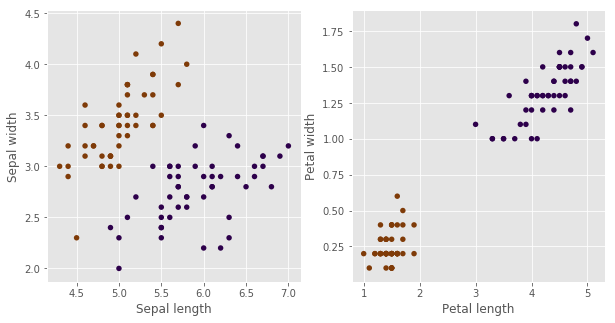

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [9]:
pred_iris = Clustering().fit_predict(x_iris)
print ("Adjusted Rand index for iris is: %.2f" % (smt.adjusted_rand_score(y_iris, pred_iris)))

Adjusted Rand index for iris is: 1.00


In [10]:
%time pred_iris = Clustering().fit_predict(x_iris)

CPU times: user 1.74 s, sys: 28.6 ms, total: 1.77 s
Wall time: 1.54 s


In [11]:
%time pred_iris = sc.AgglomerativeClustering().fit_predict(x_iris)

CPU times: user 9.32 ms, sys: 178 µs, total: 9.5 ms
Wall time: 182 ms


### реализация
У реализации данного алгоритма довольно сложно броадкастить кластеры, тк они представляют собой векторы разной длинны из элементов данных, так же необходимо на каждом шаге удалять один кластер и присоединять его к другому, что тоже, довольно сложно для меня реализовать на numpy, видимо, можно ускорить данный алгоритм, подобрав другую структуру данных, но я не нашёл такую =((
### JIT, Itertools
JIT компиляция так же не спасает ситуацию из за динамического list.
Удалось сократить число переборов кластеров с $n^2$ до $n(n-1)/2$ путём перебора по неповторяющимся парам

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [12]:
## Задание 2
def numpy_dist(X, Y):
    x_dist = (X ** 2).sum(axis=1)
    y_dist = (Y ** 2).sum(axis=1)
    xy_dist = X.dot(Y.T)
    dist = - 2 * xy_dist + y_dist + x_dist.reshape(-1, 1)
    return dist


def quality(x, y):
    """
    Implement quality criterion of your choice
    """
    m = []
    cl = np.unique(y)
    for i in cl:
        m.append(np.mean(x[y == i], axis=0))
    m = np.array(m)
    crit = np.sum(np.min(numpy_dist(x, m), axis=1))
    return crit

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

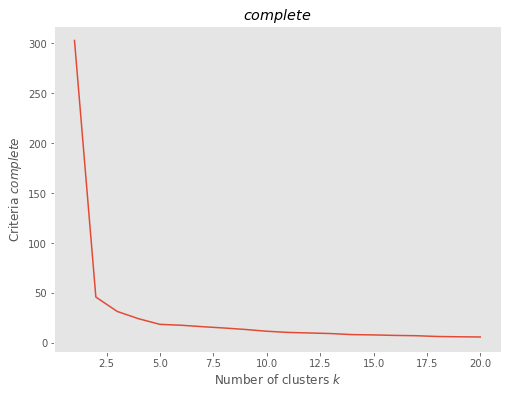

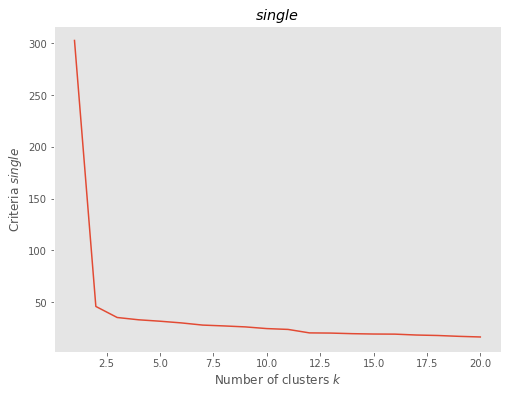

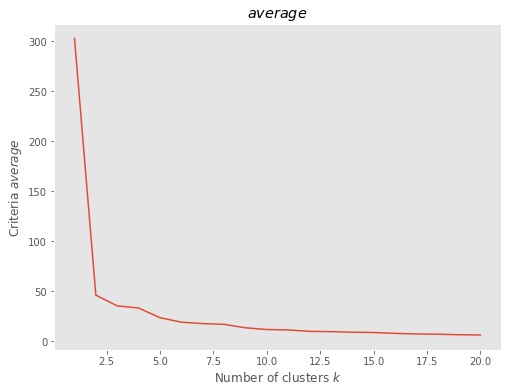

In [13]:
ks = range(1, 21)
criteria = np.zeros(len(ks))
link = ['complete', 'single', 'average']


for linkage in link:
    for i, kl in enumerate(ks):
        cls = Clustering(k = kl, linkage=linkage)
        y = cls.fit_predict(x_iris)
        criteria[i] = quality(x_iris, y)
    
    pl.figure(figsize=(8, 6))
    pl.plot(ks, criteria)
    pl.title("$"+linkage+"$")
    pl.ylabel("Criteria $"+linkage+"$")
    pl.xlabel("Number of clusters $k$")
    pl.grid()
    pl.show()

### Инерция
При увеличении числа кластеров увеличивается и число центроид => расстояния от всех точек до ближайших центроид уменьшается => Критерий надо выбирать таким образом, чтобы уменьшение между $i-1$ и $i$ шагом было максимальным т.е.
$$k = \arg\max_i(J(i)-J(i-1))$$
это показывает, что центроиды "разаместились, нашли" свои кластеры "оптимальным образом". 

In [14]:
## Задание 3
import pandas as pd
df = pd.read_csv("WDIData.csv")

In [15]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN,NaN


In [17]:
df_2015 = df[['Country Name', 'Indicator Code', '2015']]
df_2015 = df_2015.set_index(['Country Name', 'Indicator Code'])
df_2015 = df_2015.unstack()

df_2015 = (df_2015 - df_2015.mean()) / df_2015.std()
df_2015 = df_2015['2015']
df_2015 = df_2015.fillna(0)

df_2015  = df_2015[df_2015.columns[(df_2015 ** 2).sum() > 220]]
df_2015

Indicator Code,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,AG.PRD.CREL.MT,...,TX.VAL.MRCH.R1.ZS,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.OTHR.ZS.WT,TX.VAL.TRAN.ZS.WT
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.277405,0.987675,0.142908,-0.144306,-0.324364,-0.527459,-0.323971,-1.305879,-0.295237,-0.325267,...,-0.645535,0.297833,-0.489865,1.096446,6.117118,-0.486024,-0.499966,-0.300204,1.826358,-0.775193
Albania,-0.341004,0.249137,0.070328,0.680919,-0.352046,-0.144469,-0.325151,-0.145895,-0.336486,-0.339603,...,-0.607332,1.515872,-0.506124,-0.281690,-0.506784,-0.514089,-0.313547,-0.299404,-0.388561,-0.919123
Algeria,-0.271265,-0.986708,-0.044681,-0.829248,-0.324768,-0.499739,-0.322736,-1.361304,-0.181216,-0.331011,...,-0.567647,-0.060125,-0.017739,0.652650,-0.432732,-0.499390,-0.477419,-0.281296,1.345203,-0.156397
American Samoa,-0.343029,-0.642245,-0.625320,0.098543,0.000000,0.772179,-0.326688,2.501530,-0.338280,0.000000,...,0.127814,-0.278551,0.094190,-0.100066,-0.223732,1.259967,-0.498470,-0.300504,0.000000,0.000000
Andorra,-0.343005,0.111412,-0.815625,-0.939458,0.000000,0.000000,-0.326691,0.115793,-0.338262,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,-0.240563,0.473452,-0.093832,-0.766911,-0.331506,-0.525986,-0.208762,0.665560,-0.256073,-0.335888,...,1.989214,-0.529878,-0.391960,-0.483679,0.238372,-0.222146,-0.500341,-0.282315,-1.311006,-1.293846
Antigua and Barbuda,-0.343022,-0.838678,-0.686322,-0.363446,-0.353575,-0.240210,-0.326704,-0.407521,-0.338264,-0.341550,...,-0.750933,-0.540429,-0.383146,-0.457186,-0.512236,0.301536,-0.334164,-0.300423,-1.186599,-0.552751
Arab World,0.487314,-0.122175,-0.209231,-0.732593,-0.081368,-0.471706,-0.248886,-1.273205,0.560045,-0.192649,...,0.163220,-0.391480,-0.408949,0.696961,0.549860,-0.286457,0.526210,0.119314,-0.382221,0.192275
Argentina,-0.085597,0.806469,3.076686,0.045682,-0.234401,-0.507385,-0.271445,-0.957337,-0.157807,-0.185607,...,0.252330,-0.345962,2.237658,0.886449,-0.077223,-0.365376,0.207442,-0.268996,0.597474,-0.286202


In [18]:
df_2015.size

91608

In [19]:
clustering = Clustering(k=12, linkage='complete')
labels_2015 = clustering.fit_predict(df_2015.values)

In [20]:
label_dictionary = {}
for i, label in enumerate(set(labels_2015)):
    label_dictionary.update({label : i + 1})
for i in range(labels_2015.shape[0]):
    labels_2015[i] = label_dictionary[labels_2015[i]]

In [21]:
pd.options.mode.chained_assignment = None
df_2015.loc[:, 'label'] = labels_2015

for label, group in df_2015.groupby('label'):  
    print('Cluster #{}'.format(label))    
    print(group.index.tolist())

Cluster #1.0
['Venezuela, RB']
Cluster #2.0
['World']
Cluster #3.0
['IBRD only', 'IDA & IBRD total', 'Low & middle income', 'Middle income']
Cluster #4.0
['Austria', 'Canada', 'Denmark', 'Finland', 'Germany', 'Ireland', 'Luxembourg', 'Netherlands', 'North America', 'Norway', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']
Cluster #5.0
['Bahrain', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates']
Cluster #6.0
['Euro area', 'Europe & Central Asia', 'European Union', 'High income', 'OECD members', 'Post-demographic dividend']
Cluster #7.0
['Afghanistan', 'Iraq', 'Syrian Arab Republic', 'Yemen, Rep.']
Cluster #8.0
['Australia', 'Belgium', 'Bulgaria', 'Central Europe and the Baltics', 'Croatia', 'Cyprus', 'Czech Republic', 'Estonia', 'France', 'Hong Kong SAR, China', 'Hungary', 'Iceland', 'Italy', 'Japan', 'Korea, Rep.', 'Latvia', 'Lithuania', 'Macao SAR, China', 'Malta', 'New Zealand', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Singapore', 'Slovak Republic', '

In [22]:
from sklearn.manifold import TSNE
transform = TSNE(n_components=2)
embedded = transform.fit_transform(df_2015.values)

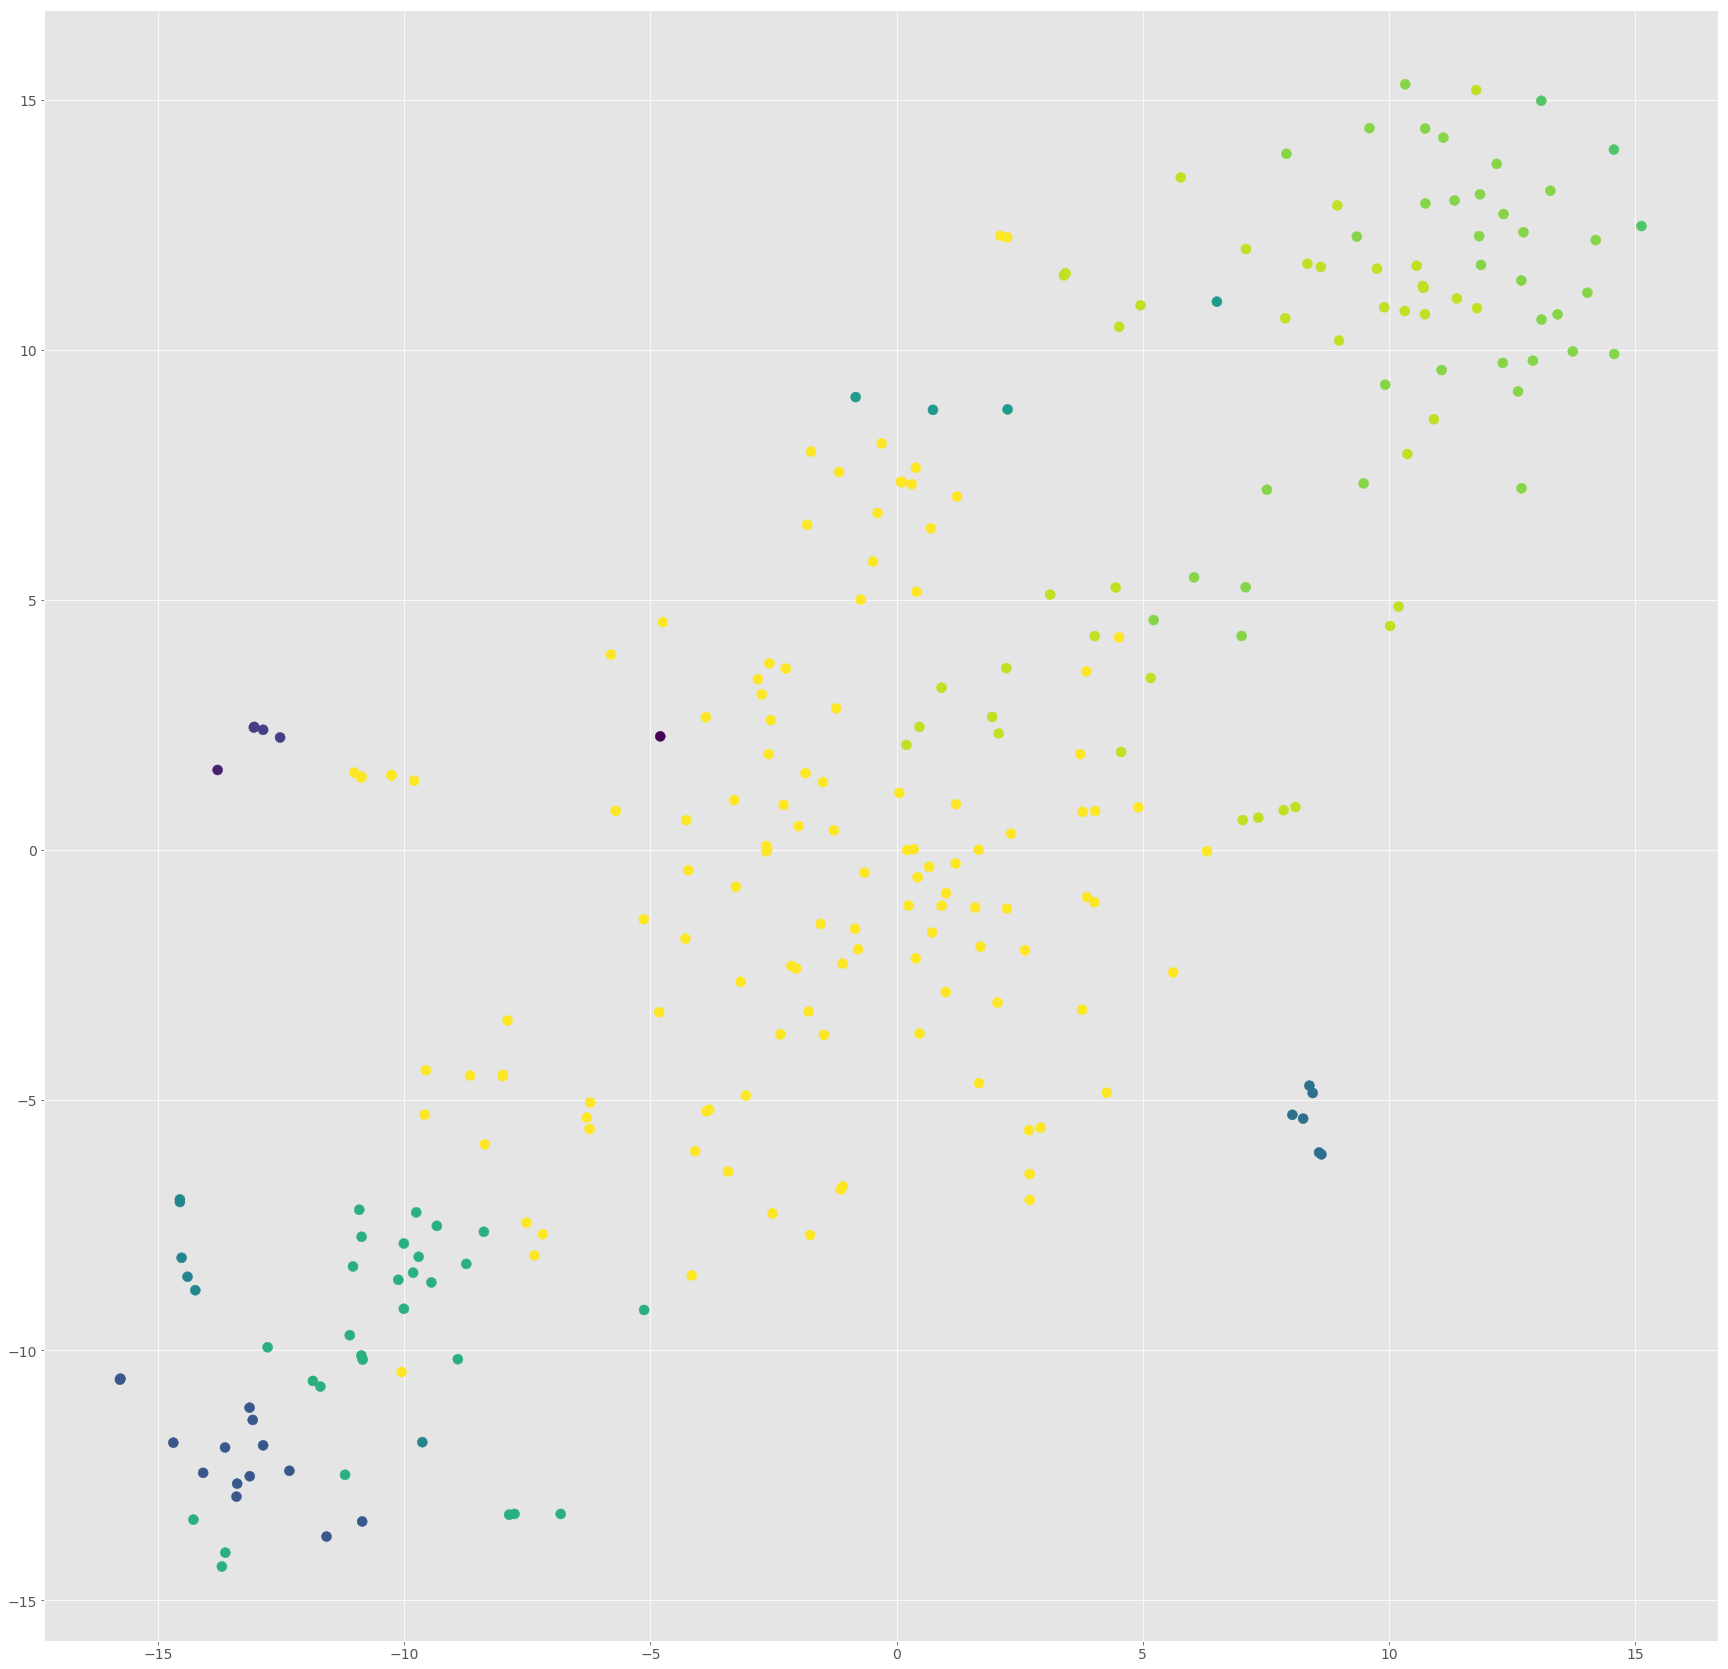

In [23]:
plt.figure(figsize=(30,30))
matplotlib.rcParams.update({'font.size': 14})

plt.scatter(embedded[:,0], embedded[:,1], c=labels_2015,  s=100)
plt.show()

In [ ]:
## Задание 4

Путём пристального взгляда и подбора паррамметров пришёл к след выводу:
На мой взгляд здесь что-то вроде взаимосвязи: колличества жителей - уровень жизни скорее всего кластеризация по
(ВВП на душу населения)
К тому же в данных есть не только страны, а усреднения: северная америка, европейский союз... и банки какие-то
<center><img src='863px-Countries_by_GDP_(PPP)_Per_Capita_in_2015.svg.png'></center>

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.